## Desafío - Árboles de Regresión
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la seccióncorrespondiente.

### Descripción
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.

#### Ejercicio 1: Preparación del ambiente de trabajo
* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score

In [4]:
df = pd.read_csv('ames_housing.csv').drop(columns=['Unnamed: 0'])
df.sample()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
374,Two_Story_1946_and_Newer,Residential_Low_Density,0,13250,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,5,2009,WD,Abnorml,154000,-93.637774,42.05184


In [5]:
df.shape

(2930, 81)

#### Ejercicio 2: Feature engineering
* Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object', realice lo siguiente:
    1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
    2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos. 


* tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [6]:
for col,serie in df.iteritems():
    if np.dtype(serie) == 'object':
        df_temp = pd.get_dummies(serie,drop_first=True)
        df = pd.concat([df,df_temp],axis=1).drop(columns=col)
        
    
    

In [7]:
df.shape

(2930, 307)

In [8]:
df.sample()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,ConLw,New,Oth,VWD,WD,AdjLand,Alloca,Family,Normal,Partial
1980,60,7200,1940,1950,279,7,0,808,808,1072,...,0,0,0,0,1,0,0,0,1,0


#### Ejercicio 3: Primer modelo
* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [9]:
Y = df.Sale_Price
X = df.drop(columns=['Sale_Price'])

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=11238)
                                                      

In [11]:
tree = DecisionTreeRegressor()

In [12]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
predic = tree.predict(X_test)

In [14]:
print("Test MSE:",mean_squared_error(y_test,predic))
print("Test MAE:",median_absolute_error(y_test,predic))
print("Test R2:",r2_score(y_test,predic))

Test MSE: 1479163535.672182
Test MAE: 16000.0
Test R2: 0.7397434230738034


Se observan valores super altos para los errores 

#### Ejercicio 4: Importancia relativa
* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [16]:
def plot_feature_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.barh(
        range(len(feat_names)), tmp_importance[sort_importance]
    )
    plt.yticks(range(len(feat_names)),
               names, rotation=0)

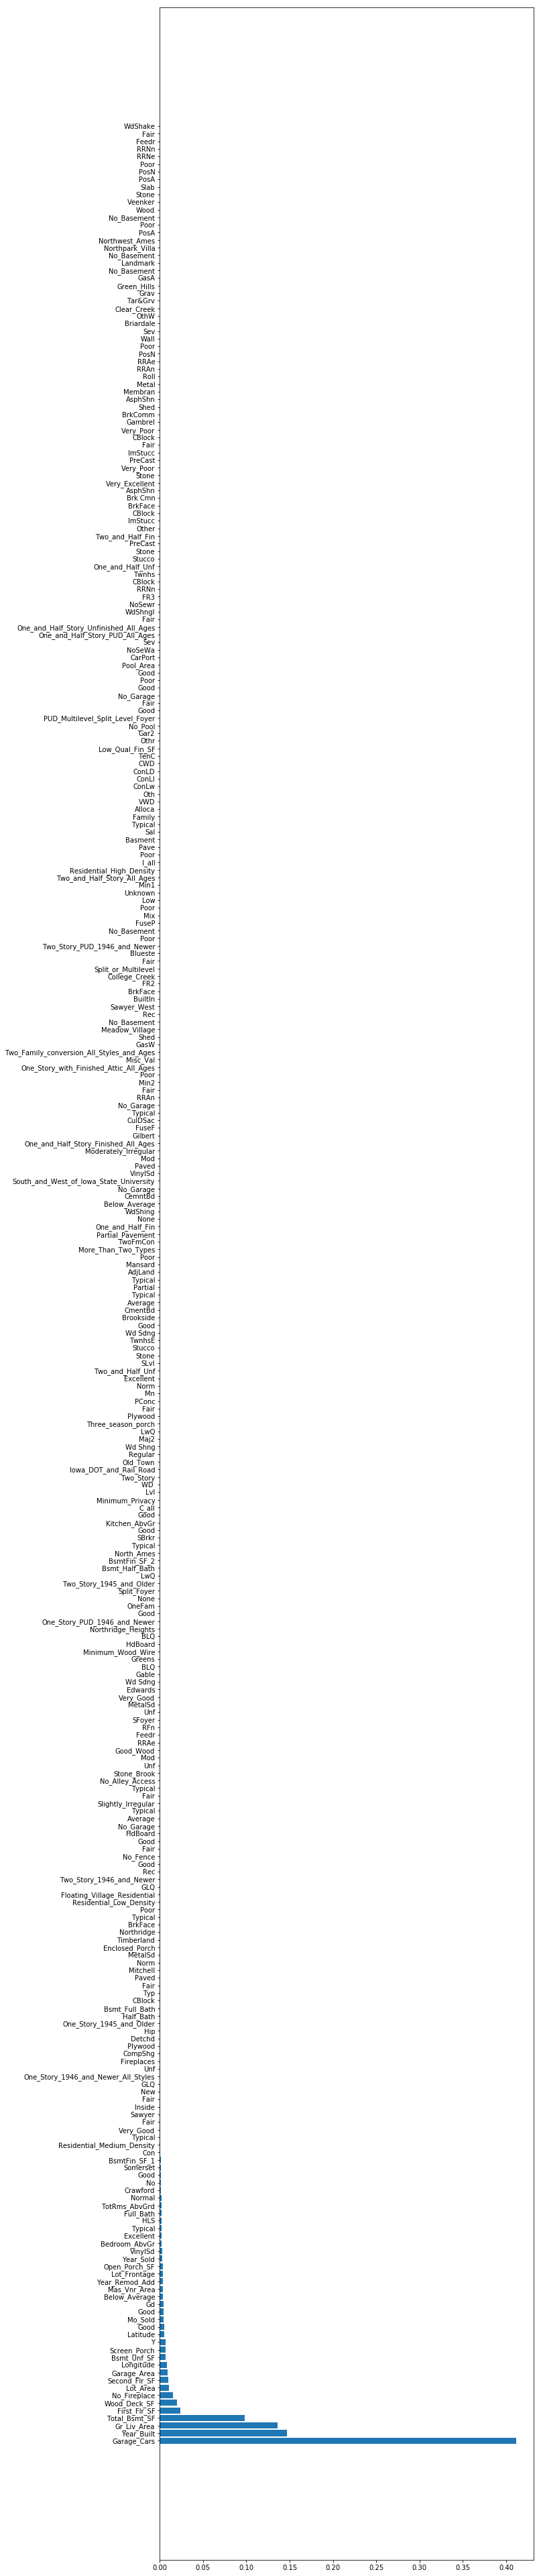

In [24]:
plt.figure(figsize=(10,70))
plot_feature_importance(tree,X.columns)

Los 10 principales atributos son:

    Garage_Cars
    Year_Built
    Total_Bsmt_SF
    Wood_Deck_SF
    No_Fireplace
    Lot_Area
    Second_Flr_SF
    Garage_Area
    Longitude
    Bsmt_Unf_SF

In [43]:
nuevo_df = pd.concat((Y,X.loc[:,['Garage_Cars','Year_Built','Total_Bsmt_SF','Wood_Deck_SF','No_Fireplace','Lot_Area','Second_Flr_SF','Garage_Area','Longitude','Bsmt_Unf_SF']]),axis=1)

In [45]:
nuevo_df.sample()

,Sale_Price,Garage_Cars,Year_Built,Total_Bsmt_SF,Wood_Deck_SF,No_Fireplace,Lot_Area,Second_Flr_SF,Garage_Area,Longitude,Bsmt_Unf_SF
202,149500,2,1915,888,160,0,8094,1074,572,-93.621674,888


#### Ejercicio 5: Refactorización del modelo y pickling
* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    * Máximo de atributos: Evalúe todos los posibles atributos.
    * Máximo de profundidad: entre 1 a 32.
    * Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

#### Pickling
* Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle.
* pickle contiene la función dump , que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:

```python  
pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav','wb'))
```

* Envíe su modelo y conjuntos de entrenamiento a un compañero.

In [48]:
X_train, X_test, y_train,y_test = train_test_split(nuevo_df.loc[:,nuevo_df.columns[1:]],Y,test_size=.33,random_state=11238)

In [49]:
tree_2 = DecisionTreeRegressor()

In [72]:
param_grid = {"max_depth": list(range(1,33)),
              "max_features":list(range(1,len(X_train.columns)+1))
              }

In [73]:
grid_cv = GridSearchCV(tree_2, param_grid, cv=5)

In [74]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 

In [77]:
print("R-Squared::{}".format(grid_cv.best_score_))
print("La mejor combinacion de hiperparametros::\n{}".format(grid_cv.best_params_))

R-Squared::0.7491539674045398
La mejor combinacion de hiperparametros::
{'max_depth': 6, 'max_features': 6}


Comparado al modelo originarl que era: 0.7397434230738034, el modelo entrenado en la grilla si es mejor

In [81]:
print("Test MSE:",mean_squared_error(y_test,grid_cv.predict(X_test)))
print("Test MAE:",median_absolute_error(y_test,grid_cv.predict(X_test)))
print("Test R2:",r2_score(y_test,grid_cv.predict(X_test)))

Test MSE: 1900085476.08228
Test MAE: 18080.42056074766
Test R2: 0.6656828471318186


In [78]:
import pickle

In [79]:
pickle.dump(grid_cv, open('moises-quiroz-actividad07.sav','wb'))